In [1]:
#Support Vector machine nedir
#Destek vektör makineleri(SVM ler vektrörel ağları destekler),sınıflandırma
#regresyon analizi için kullanılan denetimli öğrene modelidir

#bu algoritmada her bir veri maddesin belirli bir koordinatın değeri olan her özelliğin değeri 
#ile birlikte n-boyutlu boşluğa burada n sahip olduğumuz özelliklerin sayısı
# olarak çizilir 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats

In [5]:
df=pd.read_csv("TelcoCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Churn kolonumuz yes no şeklindedir yani kategorik numeric şekline çevirmemiz lazım
df.loc[df.Churn=='No','Churn']=0 #Churn olmayan
df.loc[df.Churn=='Yes','Churn']=1 #Churn olanlar 

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [24]:
dataset=df['Churn'].value_counts()
dataset


0    5174
1    1869
Name: Churn, dtype: int64

In [40]:
df1=pd.read_csv("TelcoCustomerChurn.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
#burada kategorik verileri numeric işlem çevirm
char_cols=df.dtypes.pipe(lambda x:x[x=='object']).index
for c in char_cols:
    df[c]=pd.factorize(df[c])[0]  #factorize farklı değerleri tanımlamak olduğunda df de bütün kolonlarınumeric işlermlere dönüştürür
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,29.85,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,56.95,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,53.85,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,42.30,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,70.70,4,1


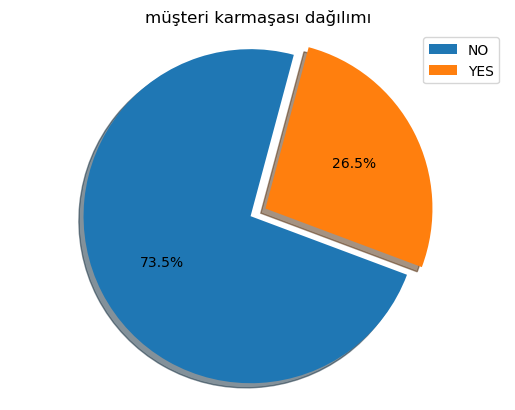

In [35]:
sizes=[5174,1869]  #pasta grafiği yapıcaz churn eden ve etmeyen müşterilen oranlarına bakıcaz
labels='NO','YES'
explode=(0,0.1)  
fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode,autopct='%1.1f%%',shadow=True,startangle=75)
ax1.axis('equal')
ax1.set_title("müşteri karmaşası dağılımı")
ax1.legend(labels)

plt.show()

In [36]:
df.groupby('gender').Churn.mean()

gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64

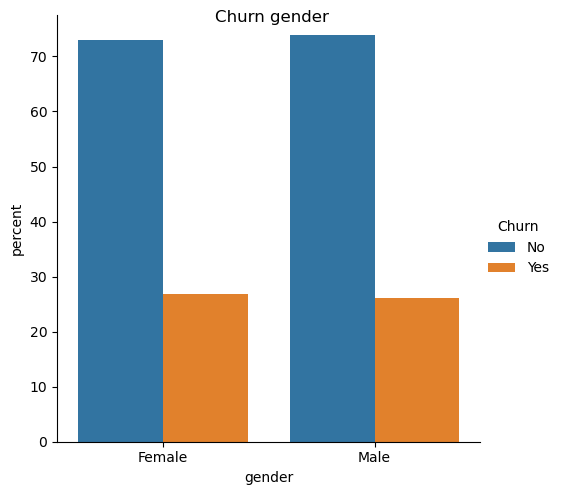

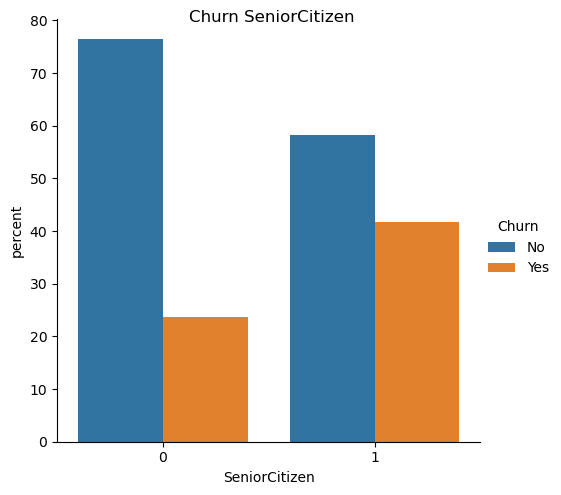

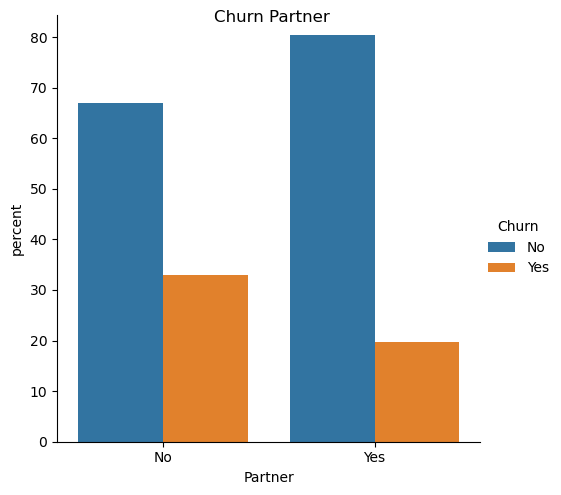

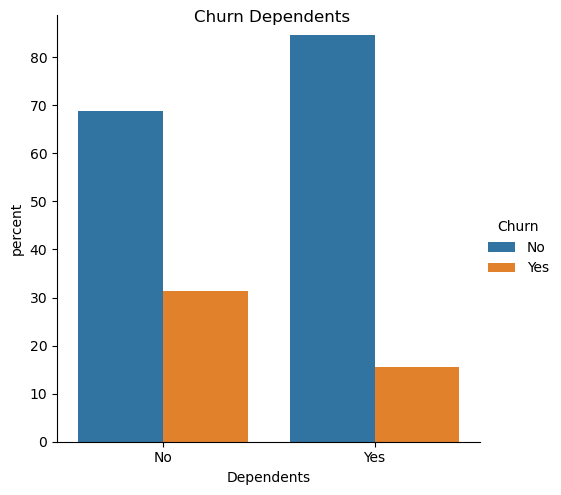

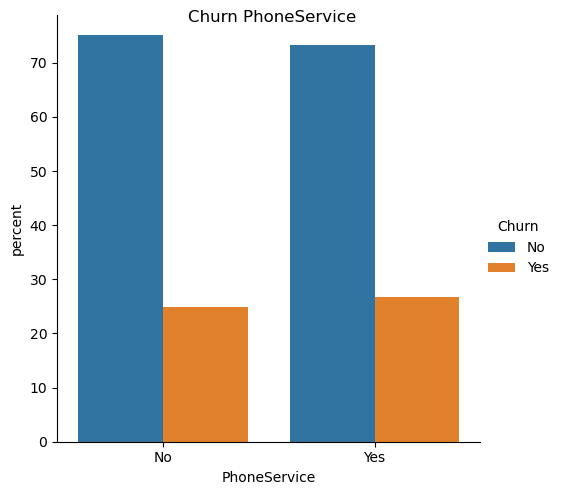

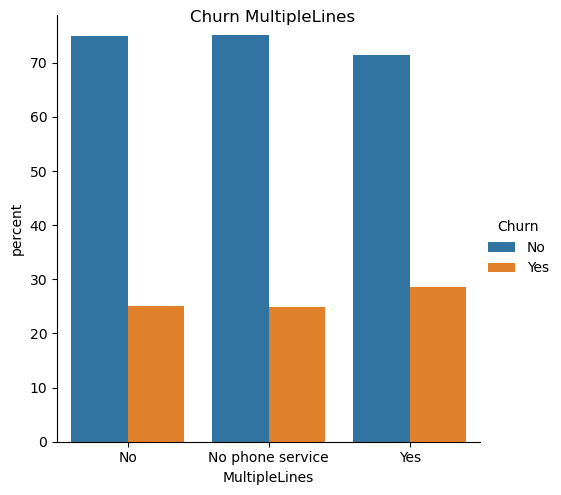

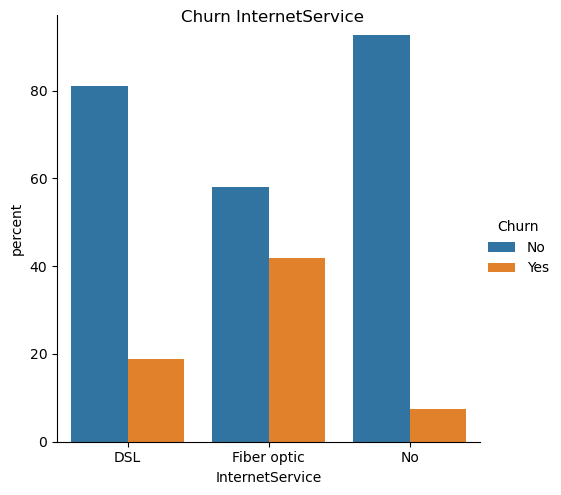

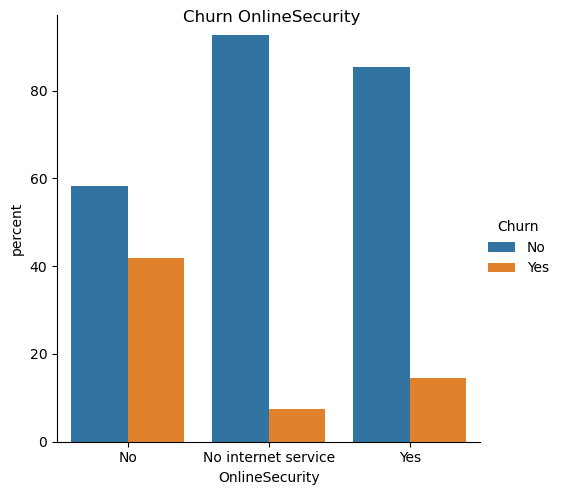

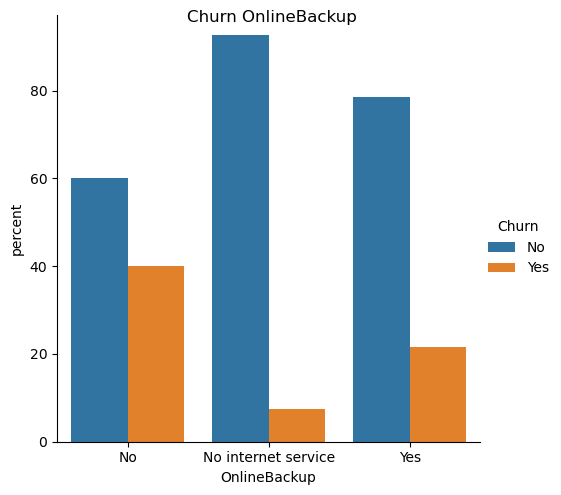

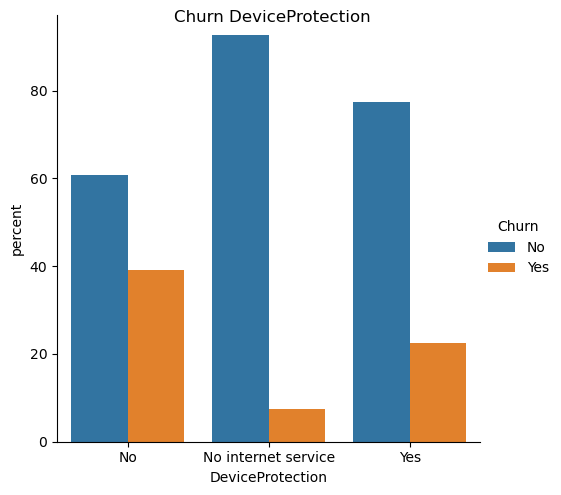

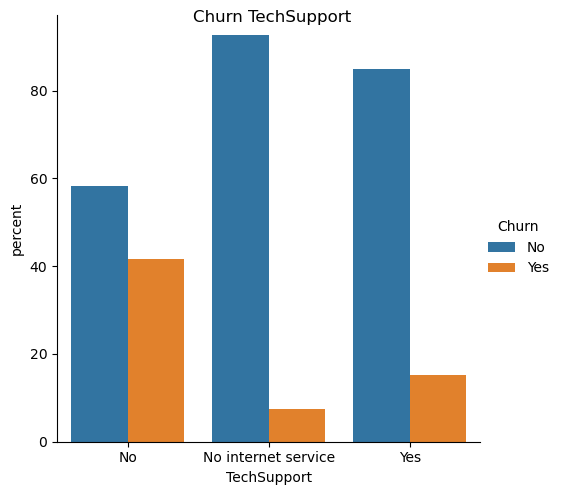

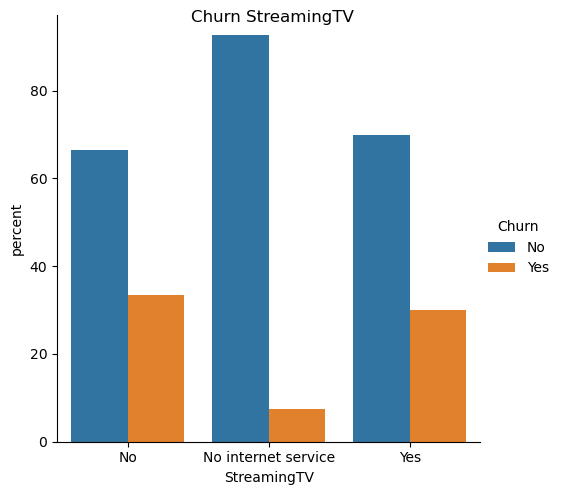

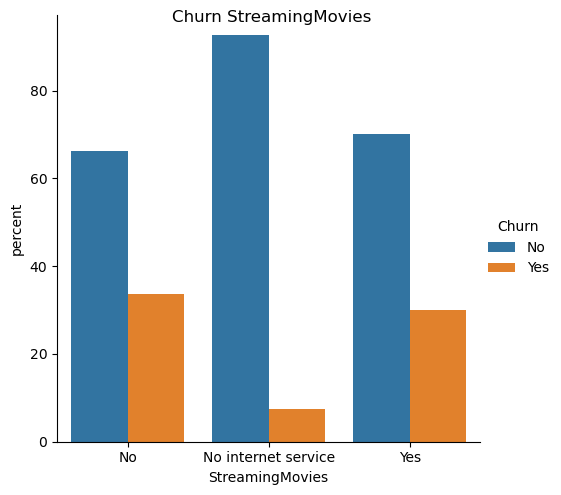

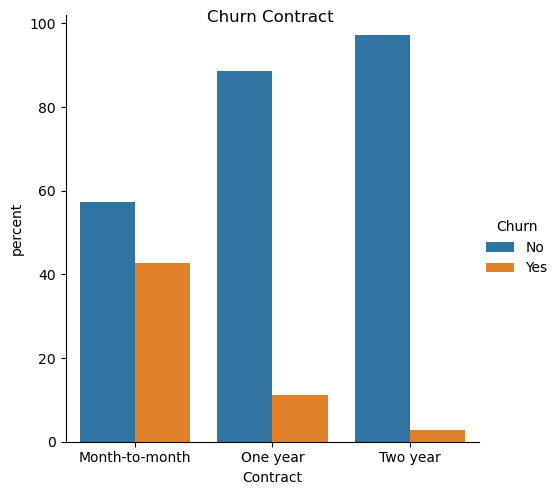

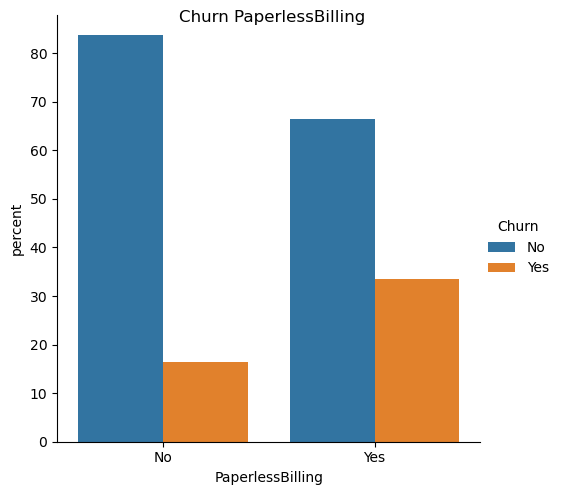

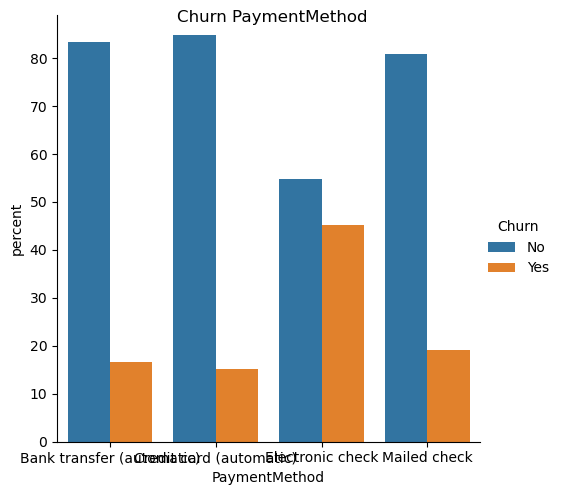

In [39]:
catvars=df1.columns.tolist() # derğerlerin listesini dönderiri str,float,time...
catvars=[e for e in catvars if e not in('TotalCharges','MonthlyCharges',
                                        'tenure','customerID','Churn')]

y='Churn'
for x in catvars:
    plot=df1.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'),x=x,y='percent',hue=y,kind='bar')
    plot.fig.suptitle("Churn "+x)
    plot

/var/folders/sx/rybvq68145n15r0k_ggr9pn00000gn/T/ipykernel_6244/3190110756.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.tenure)


<Axes: xlabel='tenure', ylabel='Density'>

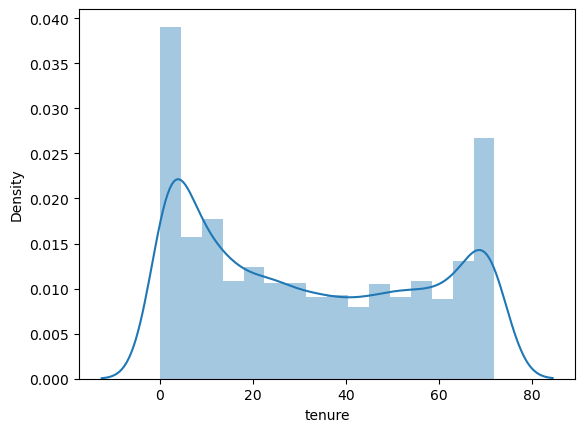

In [41]:
#tenure (hizmet süresi)
sns.distplot(df1.tenure)

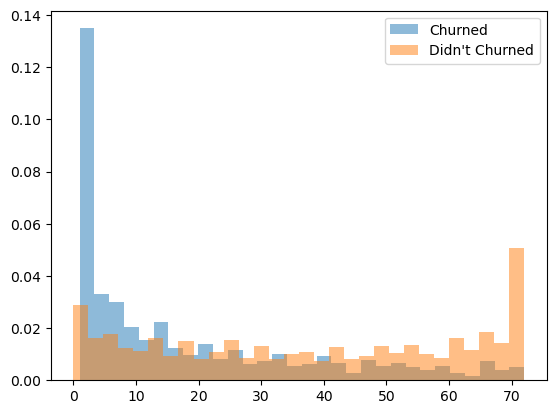

In [44]:
#Chrun için Tenure
bins=30
plt.hist(df1[df1.Churn=='Yes'].tenure,bins,alpha=0.5,density=True,label='Churned')
plt.hist(df1[df1.Churn=='No'].tenure,bins,alpha=0.5,density=True,label="Didn't Churned")
plt.legend()
plt.show()

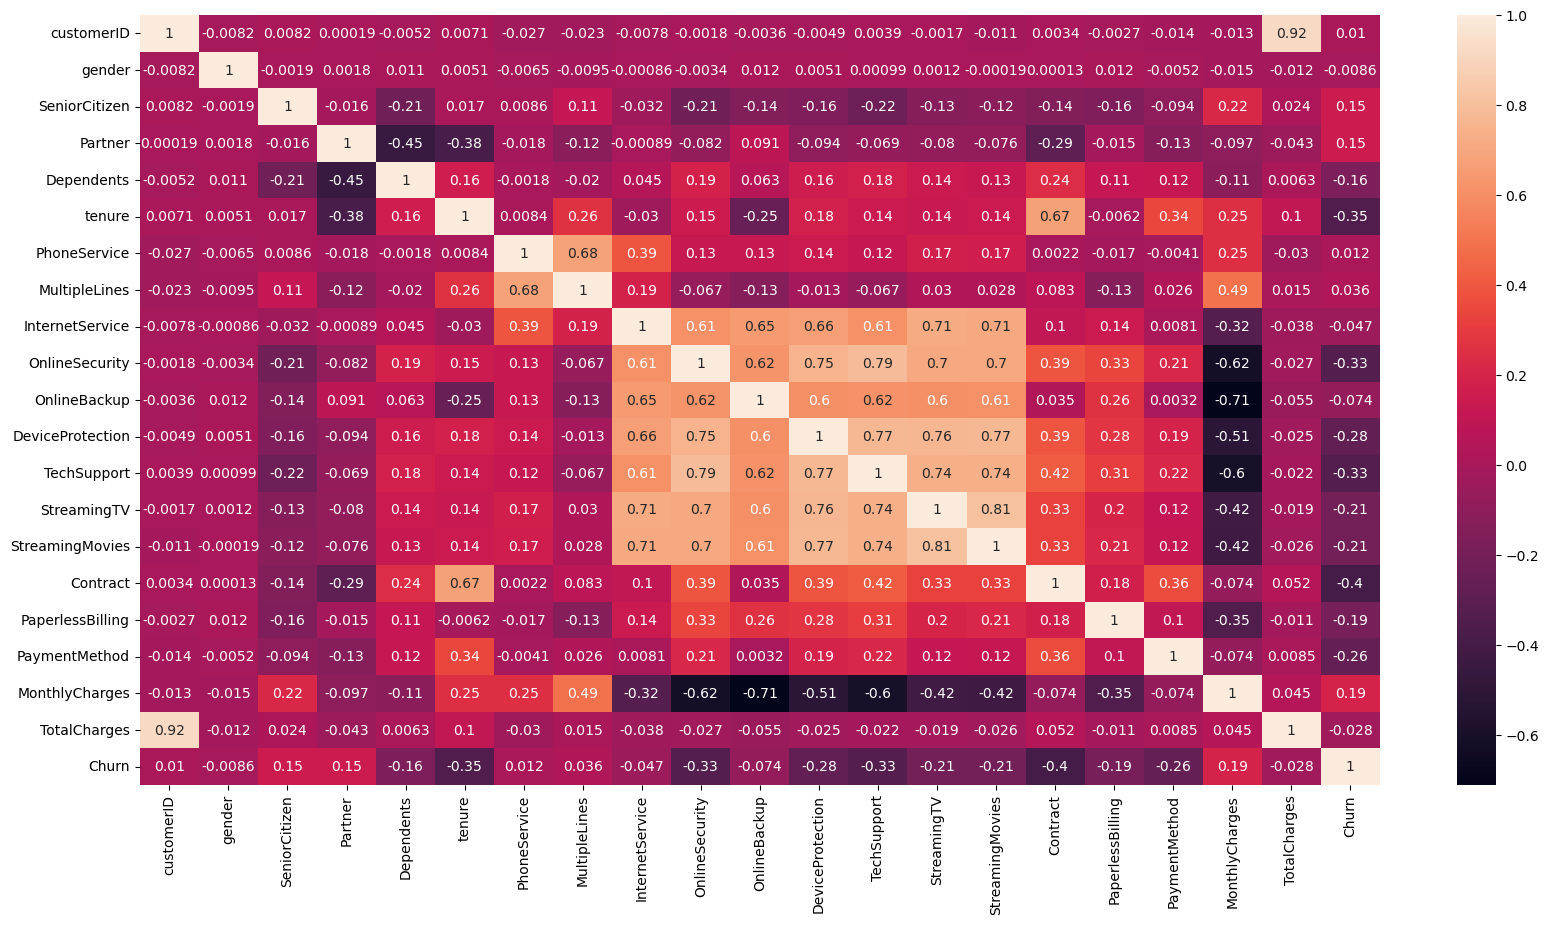

In [51]:
def show_correlations(df,show_chart=True):
    fig=plt.figure(figsize=(20,10))
    corr=df.corr()
    if show_chart == True:
        sns.heatmap(corr,xticklabels=corr.columns.values,
                   yticklabels=corr.columns.values,annot=True)
    return corr

correlation_df=show_correlations(df,show_chart=True)

In [52]:
#hedef değişkeni tanımlayım 
y=df.Churn
df=df.drop(['Churn'],axis=1)

In [55]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [56]:
#Eğitim ve test diye bölelim 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.20)

In [57]:
#Burada support vector machine algoritmasını kullanarak sınıflandıracağız
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear',degree=8)
svclassifier.fit(X_train,y_train)

SVC(degree=8, kernel='linear')

In [58]:
y_pred=svclassifier.predict(X_test) #tahmin

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[932 103]
 [208 166]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.44      0.52       374

    accuracy                           0.78      1409
   macro avg       0.72      0.67      0.69      1409
weighted avg       0.76      0.78      0.77      1409

